In [ ]:
%pip install seaborn


In [ ]:
import seaborn as sns
sns.set(color_code=True)


In [ ]:
import seaborn as sns

# Set the Seaborn style and color palette
sns.set(style="whitegrid", palette="husl")


In [ ]:
data.head()

In [ ]:
data.info()


In [ ]:
sns.barplot(data['Type of Offence'], data['VALUE'])

In [ ]:
import seaborn as sns

sns.barplot(x='Type of Offence', y='VALUE', data=data)

In [ ]:
sns.displot(data['Type of Offence'])

In [ ]:
sns.countplot(data['Type of Offence'])

In [ ]:
overall_crime = data.groupby('Quarter')['VALUE'].sum().reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(overall_crime['Quarter'], overall_crime['VALUE'], marker='o', linestyle='-', color='b')
plt.xlabel('Quarter')
plt.ylabel('Overall Crime')
plt.title('Overall Crime by Quarter')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
# Extract year from the 'Quarter' column
data['Year'] = data['Quarter'].str.extract('(\d{4})')

# Group by Year and sum the 'VALUE' column to calculate overall crime
overall_crime_by_year = data.groupby('Year')['VALUE'].sum().reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(overall_crime_by_year['Year'], overall_crime_by_year['VALUE'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Overall Crime')
plt.title('Overall Crime by Year')
plt.grid()
plt.show()

In [ ]:
# Group by Garda Division and sum the 'VALUE' column to calculate overall crime
overall_crime_by_division = data.groupby('Garda Division')['VALUE'].sum().reset_index()



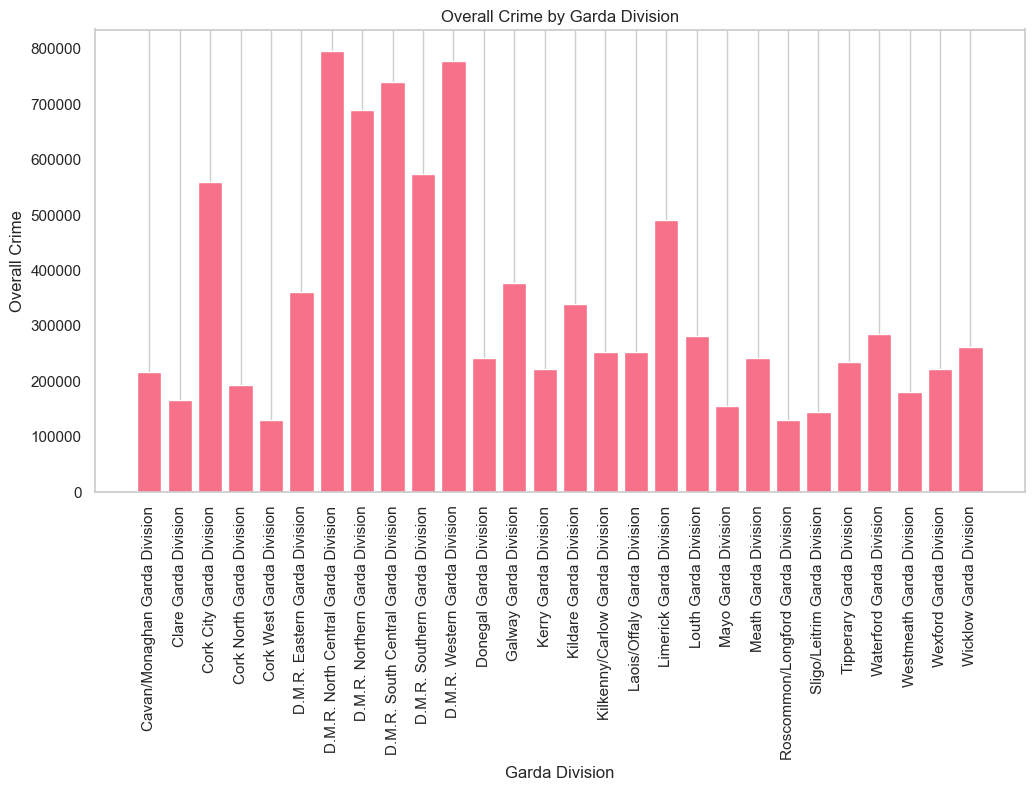

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(overall_crime_by_division['Garda Division'], overall_crime_by_division['VALUE'])
plt.xlabel('Garda Division')
plt.ylabel('Overall Crime')
plt.title('Overall Crime by Garda Division')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [ ]:
overall_crime = data.groupby('Quarter')['VALUE'].sum().reset_index()

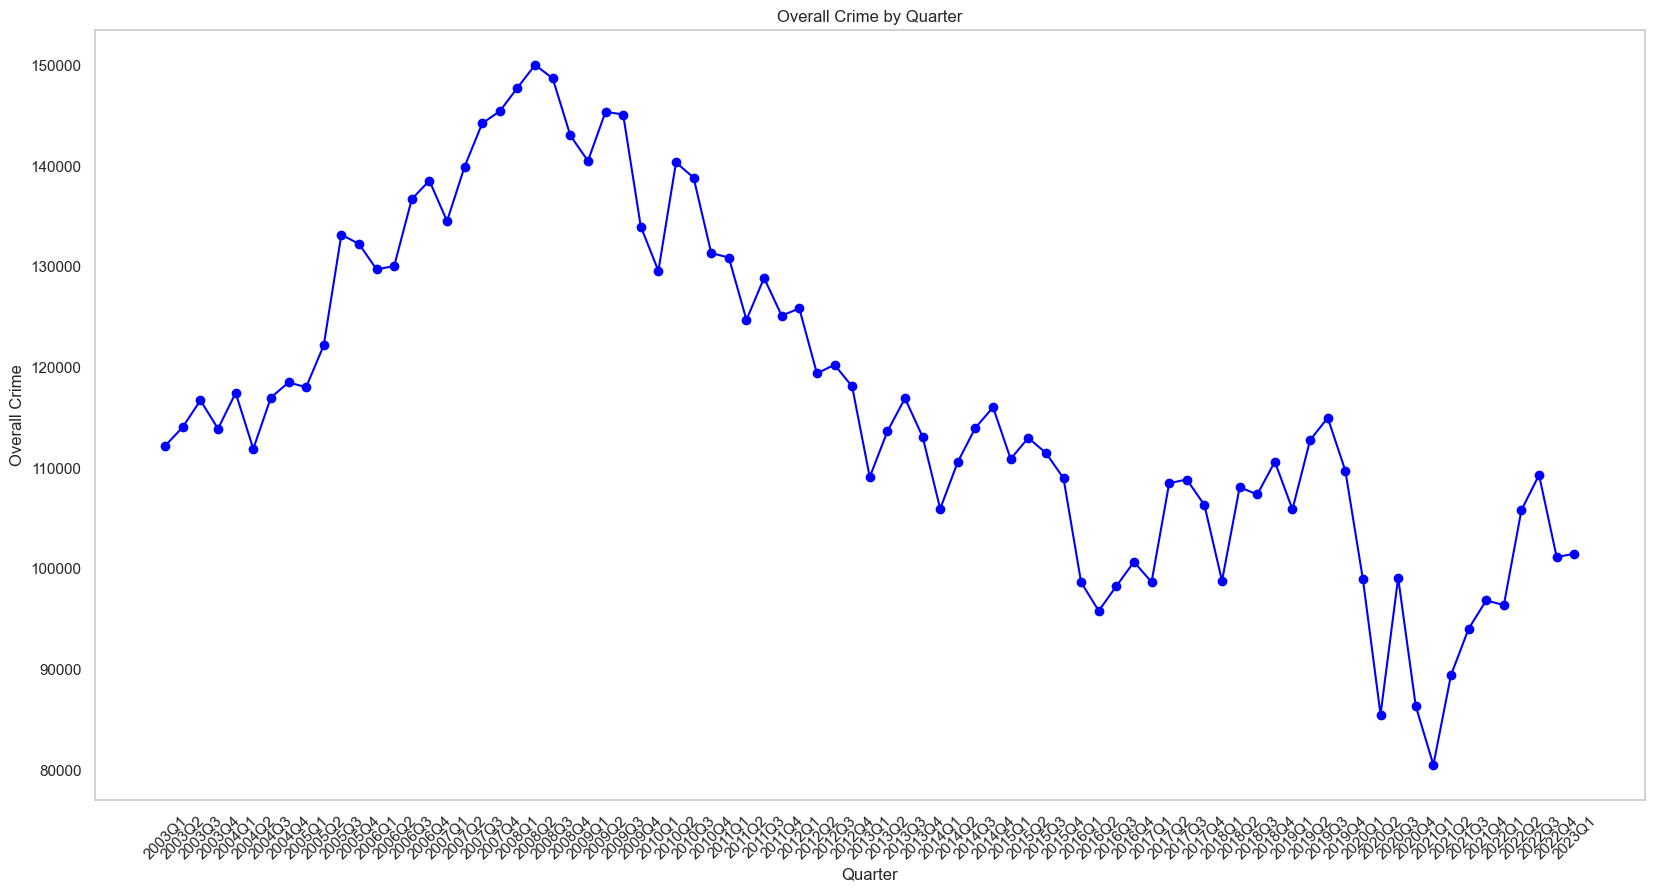

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(overall_crime['Quarter'], overall_crime['VALUE'], marker='o', linestyle='-', color='b')
plt.xlabel('Quarter')
plt.ylabel('Overall Crime')
plt.title('Overall Crime by Quarter')
plt.xticks(rotation=45)
plt.grid()
plt.show()

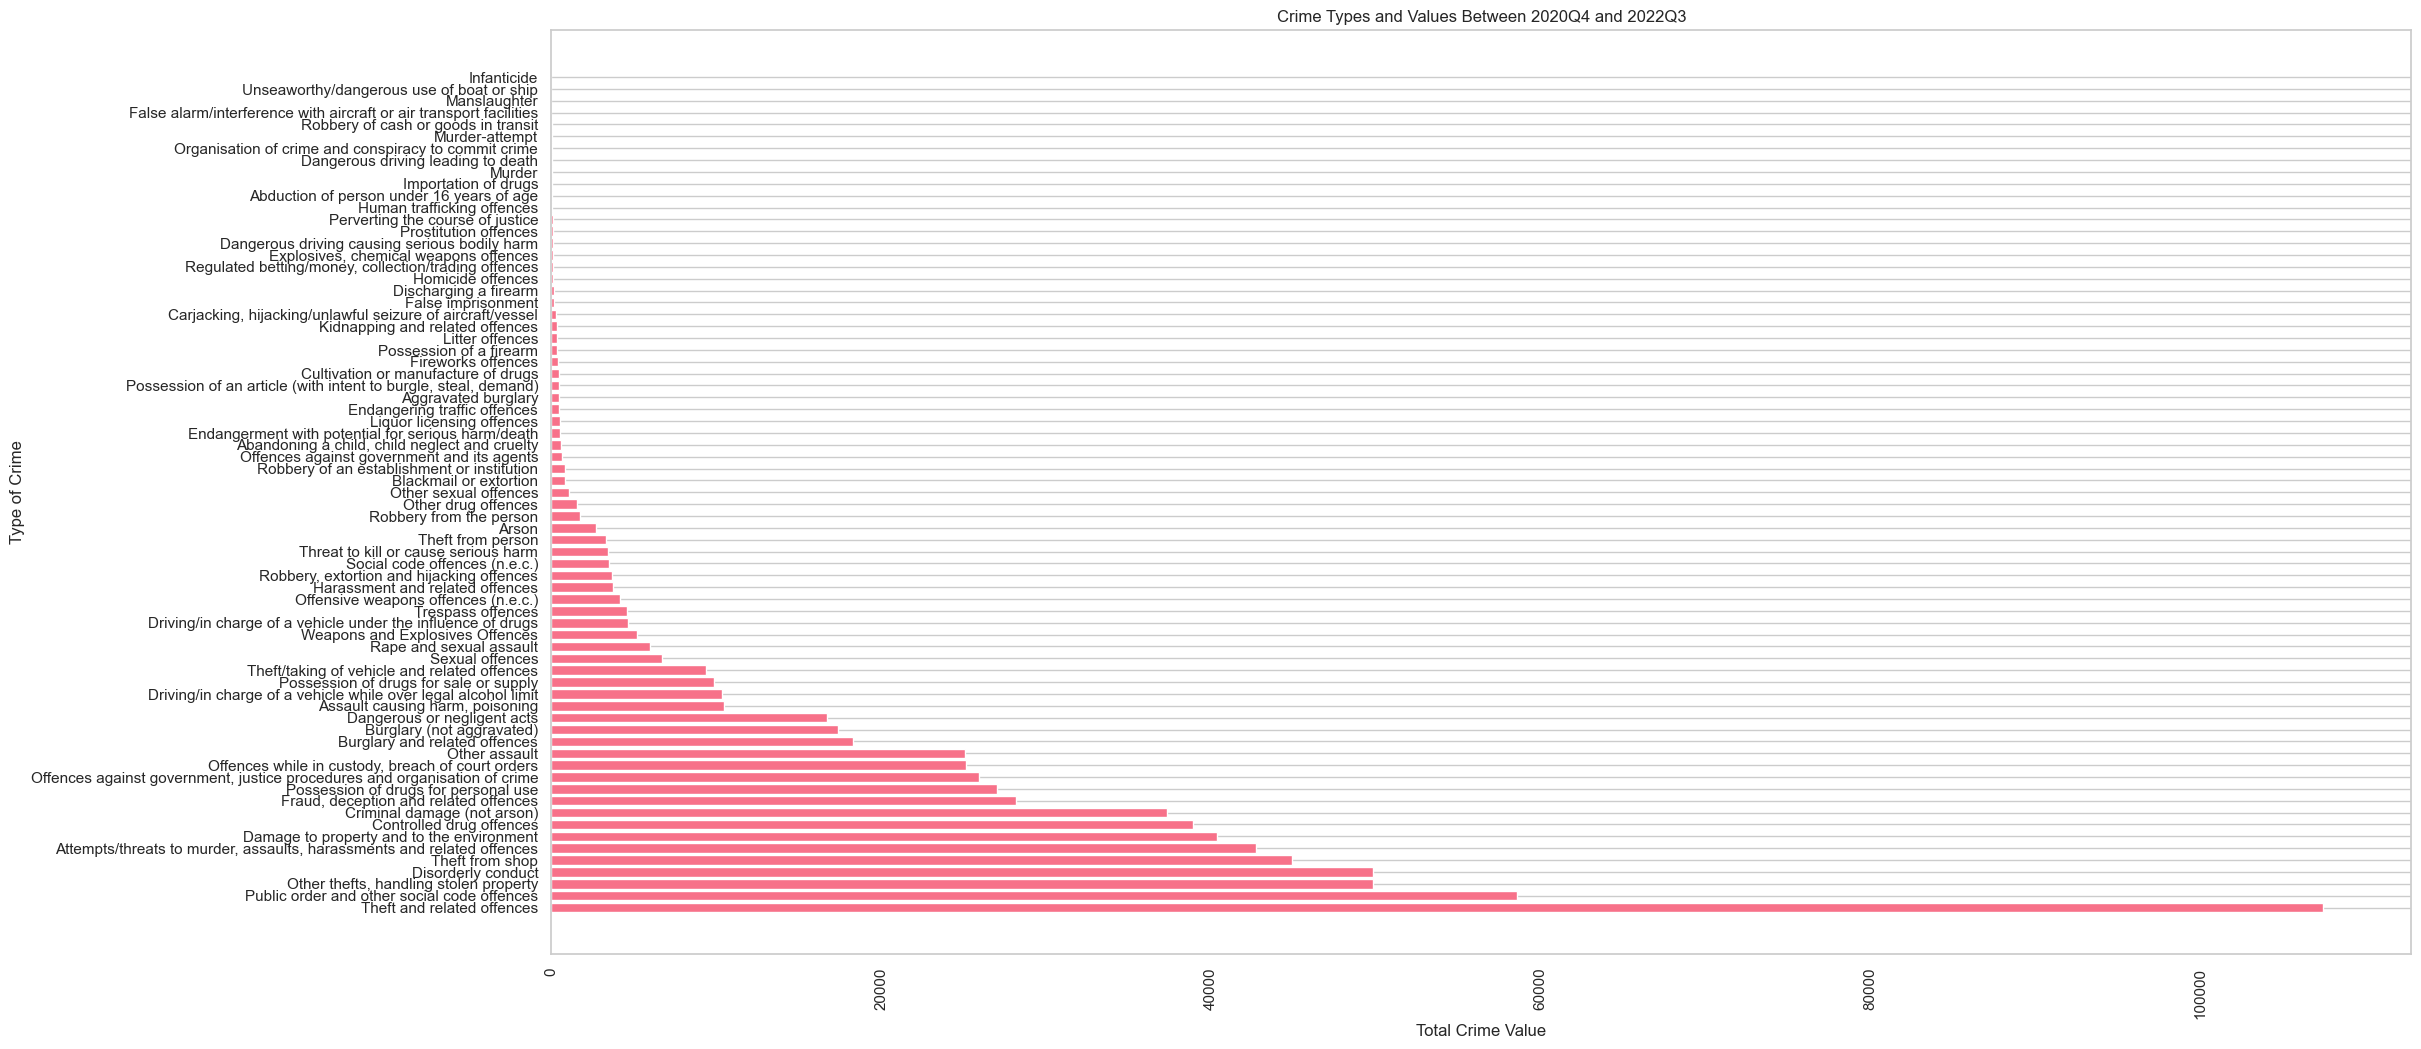

In [ ]:

start_quarter = '2020Q4'
end_quarter = '2022Q3'
mask = (data['Quarter'] >= start_quarter) & (data['Quarter'] <= end_quarter)

# Apply the mask to filter the data
filtered_data = data[mask]

# Group the data by 'Type of Offence' and calculate the sum of 'VALUE' for each type
crime_type_data = filtered_data.groupby('Type of Offence')['VALUE'].sum().reset_index()

# Sort the data in descending order for better visualization
crime_type_data = crime_type_data.sort_values(by='VALUE', ascending=False)

# Create a bar plot to visualize the types of crime and their values
plt.figure(figsize=(24, 12))
plt.barh(crime_type_data['Type of Offence'], crime_type_data['VALUE'])
plt.xlabel('Total Crime Value')
plt.ylabel('Type of Crime')
plt.title('Crime Types and Values Between 2020Q4 and 2022Q3')
plt.grid(axis='x')

# Rotate the crime type labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:

start_quarter = '2003Q1'
end_quarter = '2023Q1'
mask = (data['Quarter'] >= start_quarter) & (data['Quarter'] <= end_quarter)

# Apply the mask to filter the data
filtered_data = data[mask]

# Group the data by 'Type of Offence' and calculate the sum of 'VALUE' for each type
crime_type_data = filtered_data.groupby('Type of Offence')['VALUE'].sum().reset_index()

# Sort the data in descending order for better visualization
crime_type_data = crime_type_data.sort_values(by='VALUE', ascending=False)

# Create a bar plot to visualize the types of crime and their values
plt.figure(figsize=(24, 12))
plt.barh(crime_type_data['Type of Offence'], crime_type_data['VALUE'])
plt.xlabel('Total Crime Value')
plt.ylabel('Type of Crime')
plt.title('Crime Types and Values Between 2003Q1 and 2023Q1')
plt.grid(axis='x')

# Rotate the crime type labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [35]:


data = pd.read_excel('Irish crime data.xlsx')  

# Exclude 2023 data(i excluded this because 2023 only has 1 quarter and will impact the results)
data = data[data['Quarter'].str[:4] != '2023']

# Extract year from 'Quarter' column and create a new 'Year' column
data['Year'] = data['Quarter'].str[:4]

# Calculate total crime value for each year
yearly_crime_totals = data.groupby('Year')['VALUE'].sum().reset_index()

# Year with the most crime
year_with_most_crime = yearly_crime_totals.loc[yearly_crime_totals['VALUE'].idxmax()]

# Year with the least crime
year_with_least_crime = yearly_crime_totals.loc[yearly_crime_totals['VALUE'].idxmin()]

print("Year with the most crime:", year_with_most_crime['Year'])
print("Year with the least crime:", year_with_least_crime['Year'])

# Most popular type of crime by year
popular_crime_by_year = data.groupby(['Year', 'Type of Offence']).agg({'VALUE': 'sum'}).reset_index()
most_popular_crime_by_year = popular_crime_by_year.loc[popular_crime_by_year.groupby('Year')['VALUE'].idxmax()]

print("\nMost popular type of crime by year:")
print(most_popular_crime_by_year[['Year', 'Type of Offence', 'VALUE']])

# Least popular type of crime
least_popular_crime = data.groupby('Type of Offence')['VALUE'].sum().idxmin()
print("\nLeast popular type of crime:", least_popular_crime)

# Garda Division with the most crime for all years
division_most_crime = data.groupby('Garda Division')['VALUE'].sum().idxmax()
print("\nGarda Division with the most crime for all years:", division_most_crime)

# Garda Division with the least crime for all years
division_least_crime = data.groupby('Garda Division')['VALUE'].sum().idxmin()
print("Garda Division with the least crime for all years:", division_least_crime)



Year with the most crime: 2008
Year with the least crime: 2021

Most popular type of crime by year:
      Year             Type of Offence  VALUE
63    2003  Theft and related offences  73417
134   2004  Theft and related offences  72190
205   2005  Theft and related offences  73033
276   2006  Theft and related offences  74516
347   2007  Theft and related offences  75128
418   2008  Theft and related offences  76805
489   2009  Theft and related offences  76912
560   2010  Theft and related offences  76645
631   2011  Theft and related offences  76657
702   2012  Theft and related offences  76118
773   2013  Theft and related offences  78427
844   2014  Theft and related offences  77632
915   2015  Theft and related offences  75691
986   2016  Theft and related offences  64456
1057  2017  Theft and related offences  69258
1128  2018  Theft and related offences  66908
1199  2019  Theft and related offences  68144
1270  2020  Theft and related offences  51463
1341  2021  Theft and rela

In [7]:
import pandas as pd

# Load data from Excel
data = pd.read_excel("irish crime data.xlsx")

In [9]:
# Filter the data for 'Carlow' in the 'Garda Division' column
carlow_crimes = data[data['Garda Division'] == 'Kilkenny/Carlow Garda Division']

# Display the filtered data for all crimes in Carlow
print(carlow_crimes)


                                  STATISTIC Label Quarter  \
1420    Recorded Crime Offences under Reservation  2003Q1   
1421    Recorded Crime Offences under Reservation  2003Q1   
1422    Recorded Crime Offences under Reservation  2003Q1   
1423    Recorded Crime Offences under Reservation  2003Q1   
1424    Recorded Crime Offences under Reservation  2003Q1   
...                                           ...     ...   
160526  Recorded Crime Offences under Reservation  2023Q1   
160527  Recorded Crime Offences under Reservation  2023Q1   
160528  Recorded Crime Offences under Reservation  2023Q1   
160529  Recorded Crime Offences under Reservation  2023Q1   
160530  Recorded Crime Offences under Reservation  2023Q1   

                        Garda Division  \
1420    Kilkenny/Carlow Garda Division   
1421    Kilkenny/Carlow Garda Division   
1422    Kilkenny/Carlow Garda Division   
1423    Kilkenny/Carlow Garda Division   
1424    Kilkenny/Carlow Garda Division   
...            

In [15]:
kilkenny_carlow_data = data[data['Garda Division'] == 'Kilkenny/Carlow Garda Division']

if not kilkenny_carlow_data.empty:
    # Group data by 'Type of Offence' and sum the 'VALUE' for each type of offense
    offence_values = kilkenny_carlow_data.groupby('Type of Offence')['VALUE'].sum().reset_index()

    if not offence_values.empty:
        # Find the crime with the highest total value in Kilkenny/Carlow Garda Division
        most_valuable_crime = offence_values.loc[offence_values['VALUE'].idxmax()]
        print("The most valuable crime in Kilkenny/Carlow Garda Division is:", most_valuable_crime['Type of Offence'])


The most valuable crime in Kilkenny/Carlow Garda Division is: Theft and related offences


In [18]:
kilkenny_carlow_data = data[data['Garda Division'] == 'Kilkenny/Carlow Garda Division']

if not kilkenny_carlow_data.empty:
    # Group data by 'Type of Offence' and sum the 'VALUE' for each type of offense
    offence_values = kilkenny_carlow_data.groupby('Type of Offence')['VALUE'].sum().reset_index()

    if not offence_values.empty:
        # Display all types of crimes and their corresponding values
        print(offence_values)
    

                                  Type of Offence  VALUE
0   Abandoning a child, child neglect and cruelty    172
1       Abduction of person under 16 years of age      8
2                             Aggravated burglary    161
3                                           Arson   1036
4                 Assault causing harm, poisoning   2257
..                                            ...    ...
66   Theft/taking of vehicle and related offences   3045
67           Threat to kill or cause serious harm    305
68                              Trespass offences   1338
69      Unseaworthy/dangerous use of boat or ship      1
70                Weapons and Explosives Offences   1153

[71 rows x 2 columns]


In [19]:
kilkenny_carlow_data = data[data['Garda Division'] == 'Kilkenny/Carlow Garda Division']

if not kilkenny_carlow_data.empty:
    # Group data by 'Quarter', 'Type of Offence', and sum the 'VALUE' for each type of offense
    offence_values_by_quarter = kilkenny_carlow_data.groupby(['Quarter', 'Type of Offence'])['VALUE'].sum().reset_index()

    if not offence_values_by_quarter.empty:
        # Display all types of crimes and their corresponding values organized by quarter
        print(offence_values_by_quarter)
   

     Quarter                                Type of Offence  VALUE
0     2003Q1  Abandoning a child, child neglect and cruelty      1
1     2003Q1      Abduction of person under 16 years of age      0
2     2003Q1                            Aggravated burglary      1
3     2003Q1                                          Arson      7
4     2003Q1                Assault causing harm, poisoning     31
...      ...                                            ...    ...
5746  2023Q1   Theft/taking of vehicle and related offences     17
5747  2023Q1           Threat to kill or cause serious harm      8
5748  2023Q1                              Trespass offences      8
5749  2023Q1      Unseaworthy/dangerous use of boat or ship      0
5750  2023Q1                Weapons and Explosives Offences     14

[5751 rows x 3 columns]


In [20]:
kilkenny_carlow_data = data[data['Garda Division'] == 'Kilkenny/Carlow Garda Division']

if not kilkenny_carlow_data.empty:
    # Group data by 'Quarter', 'Type of Offence', and sum the 'VALUE' for each type of offense
    offence_values_by_quarter = kilkenny_carlow_data.groupby(['Quarter', 'Type of Offence'])['VALUE'].sum().reset_index()

    if not offence_values_by_quarter.empty:
        # Save the data to a new Excel file
        offence_values_by_quarter.to_excel('offence_values_kilkenny_carlow.xlsx', index=False)
        print("Data saved to 'offence_values_kilkenny_carlow.xlsx'")
  

Data saved to 'offence_values_kilkenny_carlow.xlsx'


In [21]:
kilkenny_carlow_data = data[(data['Garda Division'] == 'Kilkenny/Carlow Garda Division') & (data['VALUE'] != 0)]

if not kilkenny_carlow_data.empty:
    # Group data by 'Quarter', 'Type of Offence', and sum the 'VALUE' for each type of offense
    offence_values_by_quarter = kilkenny_carlow_data.groupby(['Quarter', 'Type of Offence'])['VALUE'].sum().reset_index()

    if not offence_values_by_quarter.empty:
        # Save the filtered data to a new Excel file
        offence_values_by_quarter.to_excel('offence_values_kilkenny_carlow_filtered.xlsx', index=False)
        print("Filtered data (non-zero values) saved to 'offence_values_kilkenny_carlow_filtered.xlsx'")
 

Filtered data (non-zero values) saved to 'offence_values_kilkenny_carlow_filtered.xlsx'


In [23]:
data = pd.read_excel('offence_values_kilkenny_carlow_filtered.xlsx')  

# Filter the data for 'Kilkenny/Carlow Garda Division' and specific quarters (e.g., 'Q1' of each year)
kilkenny_carlow_data = data[
    (data['Quarter'].str.endswith('Q1'))  # Change 'Q1' to filter other quarters (e.g., 'Q2', 'Q3', 'Q4')
]

if not kilkenny_carlow_data.empty:
    # Display the filtered data for the specific quarters
    print(kilkenny_carlow_data)


     Quarter                                    Type of Offence  VALUE
0     2003Q1      Abandoning a child, child neglect and cruelty      1
1     2003Q1                                Aggravated burglary      1
2     2003Q1                                              Arson      7
3     2003Q1                    Assault causing harm, poisoning     31
4     2003Q1  Attempts/threats to murder, assaults, harassme...     98
...      ...                                                ...    ...
3855  2023Q1                                    Theft from shop    164
3856  2023Q1       Theft/taking of vehicle and related offences     17
3857  2023Q1               Threat to kill or cause serious harm      8
3858  2023Q1                                  Trespass offences      8
3859  2023Q1                    Weapons and Explosives Offences     14

[1005 rows x 3 columns]


In [24]:
data = pd.read_excel('offence_values_kilkenny_carlow_filtered.xlsx')  

if not data.empty:
    # Find the crime with the highest total value in the filtered data
    most_valuable_crime = data.loc[data['VALUE'].idxmax()]
    print("The crime with the most value in the specified quarters is:", most_valuable_crime['Type of Offence'])


The crime with the most value in the specified quarters is: Theft and related offences


In [25]:
if not data.empty:
    # Filter the data for 'Q2' of each year
    kilkenny_carlow_data = data[data['Quarter'].str.endswith('Q2')]

    if not kilkenny_carlow_data.empty:
        # Find the crime with the highest total value in the filtered data for Q2
        most_valuable_crime = kilkenny_carlow_data.loc[kilkenny_carlow_data['VALUE'].idxmax()]
        print("The crime with the most value in Q2 is:", most_valuable_crime['Type of Offence'])


The crime with the most value in Q2 is: Theft and related offences


In [26]:
if not data.empty:
    # Filter the data for 'Q2' of each year
    kilkenny_carlow_data = data[data['Quarter'].str.endswith('Q3')]

    if not kilkenny_carlow_data.empty:
        # Find the crime with the highest total value in the filtered data for Q3
        most_valuable_crime = kilkenny_carlow_data.loc[kilkenny_carlow_data['VALUE'].idxmax()]
        print("The crime with the most value in Q3 is:", most_valuable_crime['Type of Offence'])
 

The crime with the most value in Q2 is: Theft and related offences


In [28]:
if not data.empty:
    # Filter the data for 'Q2' of each year
    kilkenny_carlow_data = data[data['Quarter'].str.endswith('Q4')]

    if not kilkenny_carlow_data.empty:
        # Find the crime with the highest total value in the filtered data for Q4
        most_valuable_crime = kilkenny_carlow_data.loc[kilkenny_carlow_data['VALUE'].idxmax()]
        print("The crime with the most value in Q4 is:", most_valuable_crime['Type of Offence'])


The crime with the most value in Q2 is: Theft and related offences


In [31]:
# Load the filtered dataset containing specific quarters (Q2)
data = pd.read_excel('offence_values_kilkenny_carlow_filtered.xlsx')  

if not data.empty:
    # Filter the data for 'Q2' of each year
    kilkenny_carlow_data = data[data['Quarter'].str.endswith('Q4')]

    if not kilkenny_carlow_data.empty:
        # Find the crime with the highest total value in the filtered data for Q2
        most_valuable_crime = kilkenny_carlow_data.loc[kilkenny_carlow_data['VALUE'].idxmax()]
        print("The crime with the most value in Q2 is:", most_valuable_crime['Type of Offence'])
        print("Value:", most_valuable_crime['VALUE'])


The crime with the most value in Q2 is: Theft and related offences
Value: 537


In [32]:

if not data.empty:
    # Filter the data for 'Q2' of each year
    kilkenny_carlow_data = data[data['Quarter'].str.endswith('Q2')]

    if not kilkenny_carlow_data.empty:
        # Group data by 'Type of Offence' and sum the 'VALUE' for each type of offense
        offence_values = kilkenny_carlow_data.groupby('Type of Offence')['VALUE'].sum().reset_index()

        # Sort the crimes by value and display the top 10
        top_10_crimes = offence_values.nlargest(10, 'VALUE')
        print("Top 10 crimes in Q2 with the most value:")
        print(top_10_crimes[['Type of Offence', 'VALUE']])


Top 10 crimes in Q2 with the most value:
                                Type of Offence  VALUE
57                   Theft and related offences   8021
49  Public order and other social code offences   7004
18                           Disorderly conduct   6082
42       Other thefts, handling stolen property   4214
13    Damage to property and to the environment   3453
8                 Burglary and related offences   3198
11                  Criminal damage (not arson)   3175
7                     Burglary (not aggravated)   3137
59                              Theft from shop   2815
10                     Controlled drug offences   2758


In [33]:
if not data.empty:
    # Filter the data for 'Theft from shop' and 'Controlled drug offences' in Q1 from 2003 to 2023
    specific_crimes = data[
        ((data['Type of Offence'] == 'Theft from shop') | (data['Type of Offence'] == 'Controlled drug offences')) &
        (data['Quarter'].str.endswith('Q1')) & 
        (data['Quarter'].str.startswith('2003') | data['Quarter'].str.startswith('20'))  # Adjust the year range
    ]

    if not specific_crimes.empty:
        # Display the filtered data for 'Theft from shop' and 'Controlled drug offences' in Q1 by year
        print(specific_crimes[['Quarter', 'Type of Offence', 'VALUE']])


     Quarter           Type of Offence  VALUE
7     2003Q1  Controlled drug offences     90
46    2003Q1           Theft from shop     85
185   2004Q1  Controlled drug offences    128
218   2004Q1           Theft from shop    106
362   2005Q1  Controlled drug offences    139
396   2005Q1           Theft from shop    120
539   2006Q1  Controlled drug offences    124
570   2006Q1           Theft from shop    187
725   2007Q1  Controlled drug offences    137
763   2007Q1           Theft from shop    101
916   2008Q1  Controlled drug offences    189
951   2008Q1           Theft from shop    130
1110  2009Q1  Controlled drug offences    151
1149  2009Q1           Theft from shop    172
1311  2010Q1  Controlled drug offences    155
1350  2010Q1           Theft from shop    151
1512  2011Q1  Controlled drug offences    134
1544  2011Q1           Theft from shop    158
1705  2012Q1  Controlled drug offences    107
1742  2012Q1           Theft from shop    129
1894  2013Q1  Controlled drug offe

In [34]:

if not data.empty:
    # Filter the data for 'Theft from shop' and 'Controlled drug offences' in all quarters
    specific_crimes = data[
        ((data['Type of Offence'] == 'Theft from shop') | (data['Type of Offence'] == 'Controlled drug offences'))
    ]

    if not specific_crimes.empty:
        # Group the filtered data by 'Type of Offence' and sum the 'VALUE' for each type of offense
        total_values = specific_crimes.groupby(['Type of Offence', 'Quarter'])['VALUE'].sum().reset_index()
        print(total_values)


              Type of Offence Quarter  VALUE
0    Controlled drug offences  2003Q1     90
1    Controlled drug offences  2003Q2    133
2    Controlled drug offences  2003Q3     95
3    Controlled drug offences  2003Q4    102
4    Controlled drug offences  2004Q1    128
..                        ...     ...    ...
157           Theft from shop  2022Q1    133
158           Theft from shop  2022Q2    171
159           Theft from shop  2022Q3    188
160           Theft from shop  2022Q4    138
161           Theft from shop  2023Q1    164

[162 rows x 3 columns]


In [35]:
if not data.empty:
    # Filter the data for 'Theft from shop' and 'Controlled drug offences' in all quarters
    specific_crimes = data[
        ((data['Type of Offence'] == 'Theft from shop') | (data['Type of Offence'] == 'Controlled drug offences'))
    ]

    if not specific_crimes.empty:
        # Group the filtered data by 'Type of Offence' and sum the 'VALUE' for each type of offense
        total_values = specific_crimes.groupby(['Type of Offence', 'Quarter'])['VALUE'].sum().reset_index()
        print(total_values)


              Type of Offence Quarter  VALUE
0    Controlled drug offences  2003Q1     90
1    Controlled drug offences  2003Q2    133
2    Controlled drug offences  2003Q3     95
3    Controlled drug offences  2003Q4    102
4    Controlled drug offences  2004Q1    128
..                        ...     ...    ...
157           Theft from shop  2022Q1    133
158           Theft from shop  2022Q2    171
159           Theft from shop  2022Q3    188
160           Theft from shop  2022Q4    138
161           Theft from shop  2023Q1    164

[162 rows x 3 columns]


In [36]:
if not data.empty:
    # Filter the data for 'Theft from shop' and 'Controlled drug offences' in all quarters for all years
    specific_crimes = data[
        ((data['Type of Offence'] == 'Theft from shop') | (data['Type of Offence'] == 'Controlled drug offences'))
    ]

    if not specific_crimes.empty:
        # Group the filtered data by 'Type of Offence' and 'Quarter', then sum the 'VALUE' for each quarter
        total_values = specific_crimes.groupby(['Type of Offence', 'Quarter'])['VALUE'].sum().reset_index()

        # Save the data to a new Excel file
        total_values.to_excel('total_values_crimes.xlsx', index=False)
        print("Data exported to 'total_values_crimes.xlsx' successfully.")
  

Data exported to 'total_values_crimes.xlsx' successfully.


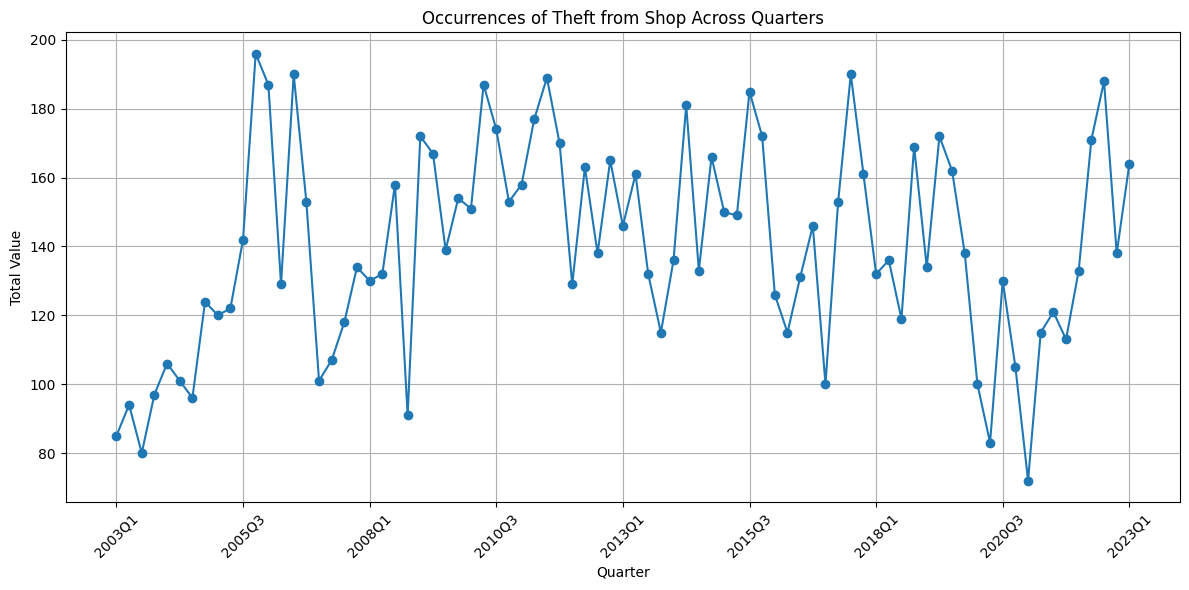

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel dataset
data = pd.read_excel('total_values_crimes.xlsx')  

if not data.empty:
    # Filter the data for 'Theft from shop'
    theft_from_shop = data[data['Type of Offence'] == 'Theft from shop']

    if not theft_from_shop.empty:
        # Group the filtered data by 'Quarter' and 'Type of Offence', then sum the 'VALUE' for each quarter
        theft_from_shop_by_quarter = theft_from_shop.groupby(['Quarter'])['VALUE'].sum()

        # Plotting the graph for 'Theft from shop' across all quarters of each year
        theft_from_shop_by_quarter.plot(kind='line', marker='o', figsize=(12, 6))
        plt.xlabel('Quarter')
        plt.ylabel('Total Value')
        plt.title('Occurrences of Theft from Shop Across Quarters')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()



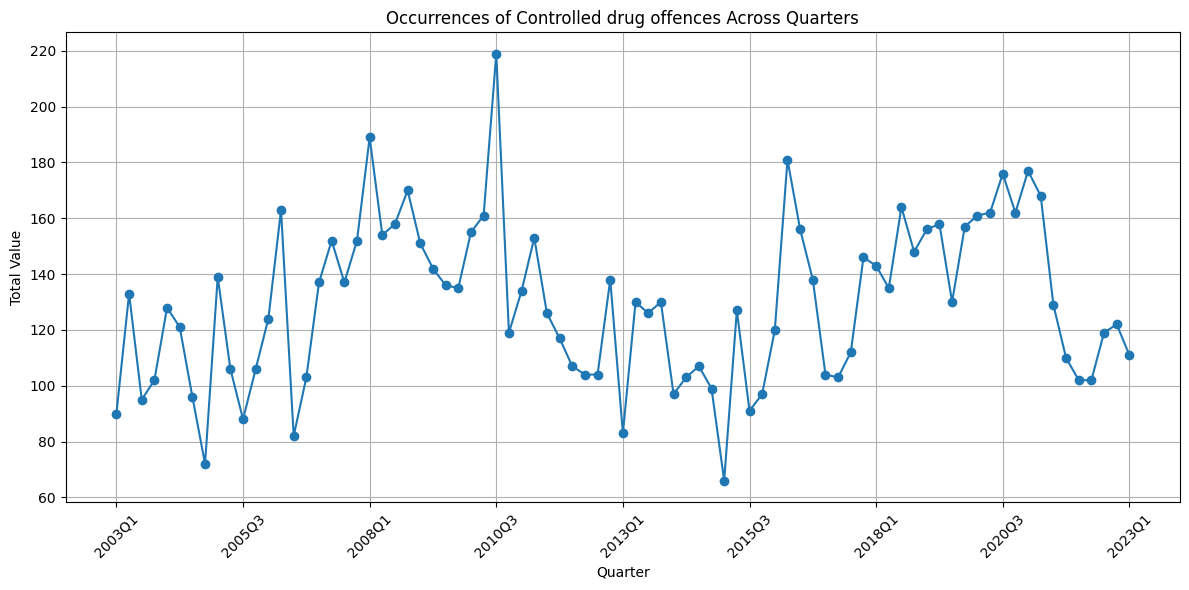

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel dataset
data = pd.read_excel('total_values_crimes.xlsx')  

if not data.empty:
    # Filter the data for 'Theft from shop'
    theft_from_shop = data[data['Type of Offence'] == 'Controlled drug offences']

    if not theft_from_shop.empty:
        # Group the filtered data by 'Quarter' and 'Type of Offence', then sum the 'VALUE' for each quarter
        theft_from_shop_by_quarter = theft_from_shop.groupby(['Quarter'])['VALUE'].sum()

        # Plotting the graph for 'Theft from shop' across all quarters of each year
        theft_from_shop_by_quarter.plot(kind='line', marker='o', figsize=(12, 6))
        plt.xlabel('Quarter')
        plt.ylabel('Total Value')
        plt.title('Occurrences of Controlled drug offences Across Quarters')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [33]:
import pandas as pd


if not data.empty:
    # Filter the data for 'Theft from shop'
    theft_from_shop = data[data['Type of Offence'] == 'Theft from shop']

    if not theft_from_shop.empty:
        # Extract year and quarter separately from the 'Quarter' column
        theft_from_shop['Year'] = theft_from_shop['Quarter'].str[:4]
        theft_from_shop['Quarter'] = theft_from_shop['Quarter'].str[-2:]

        # Convert the 'Value' column to numeric if needed
        theft_from_shop['Value'] = pd.to_numeric(theft_from_shop['VALUE'])

        # Pivot the table to have quarters as columns and sum the values for each quarter of each year
        theft_pivot = theft_from_shop.pivot_table(index='Year', columns='Quarter', values='Value', aggfunc='sum')

        # Check for years where Q2 was lower than Q3
        lower_q2_than_q3_years = theft_pivot[(theft_pivot['Q3'] < theft_pivot['Q4'])].index.tolist()
        print("Years where Q3 was lower than Q4 for 'Theft from Shop':", lower_q2_than_q3_years)

        lower_q2_than_q3_years = theft_pivot[(theft_pivot['Q4'] < theft_pivot['Q3'])].index.tolist()
        print("Years where Q4 was lower than Q3 for 'Theft from Shop':", lower_q2_than_q3_years)




Years where Q3 was lower than Q4 for 'Theft from Shop': ['2003', '2004', '2005', '2007', '2009', '2012', '2014', '2016', '2018']
Years where Q4 was lower than Q3 for 'Theft from Shop': ['2006', '2008', '2010', '2011', '2013', '2015', '2017', '2019', '2020', '2021', '2022']


C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\416403923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_from_shop['Year'] = theft_from_shop['Quarter'].str[:4]
C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\416403923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_from_shop['Quarter'] = theft_from_shop['Quarter'].str[-2:]
C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\416403923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [31]:
import pandas as pd


if not data.empty:
    # Filter the data for 'Controlled drug offences'
    drug_offences = data[data['Type of Offence'] == 'Controlled drug offences']

    if not drug_offences.empty:
        # Extract year and quarter separately from the 'Quarter' column
        drug_offences['Year'] = drug_offences['Quarter'].str[:4]
        drug_offences['Quarter'] = drug_offences['Quarter'].str[-2:]

        # Convert the 'Value' column to numeric if needed
        drug_offences['Value'] = pd.to_numeric(drug_offences['VALUE'])

        # Pivot the table to have quarters as columns and sum the values for each quarter of each year
        drug_offences_pivot = drug_offences.pivot_table(index='Year', columns='Quarter', values='Value', aggfunc='sum')

        # Check for years where Q3 was lower than Q4
        lower_q2_than_q3_years = drug_offences_pivot[(drug_offences_pivot['Q3'] < drug_offences_pivot['Q4'])].index.tolist()
        print("Years where Q3 was lower than Q4 for 'Controlled drug offences':", lower_q2_than_q3_years)
        # Check for years where Q4 was lower than Q3
        lower_q2_than_q3_years = drug_offences_pivot[(drug_offences_pivot['Q4'] < drug_offences_pivot['Q3'])].index.tolist()
        print("Years where Q4 was lower than Q3 for 'Controlled drug offences':", lower_q2_than_q3_years)
  


Years where Q3 was lower than Q4 for 'Controlled drug offences': ['2003', '2005', '2006', '2007', '2008', '2012', '2013', '2015', '2017', '2019', '2022']
Years where Q4 was lower than Q3 for 'Controlled drug offences': ['2004', '2009', '2010', '2011', '2014', '2016', '2018', '2020', '2021']


C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\82386623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_offences['Year'] = drug_offences['Quarter'].str[:4]
C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\82386623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_offences['Quarter'] = drug_offences['Quarter'].str[-2:]
C:\Users\s3bas\AppData\Local\Temp\ipykernel_22632\82386623.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l